In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('oneida.csv')
df

,ABUNDANCE,BIOMAS,GENUS_SPECIES,SAMPLE_DESC,PLOT,LATITUDE,LONGITUDE,DAY,MONTH,YEAR
0,0.01,0.01,Alona sp,10_2_1995_43.18083_-75.92639,NaN,43.18083,-75.92639,10,2,1995
1,0.01,0.02,Bosmina longirostris,17_3_1993_43.18083_-75.92639,NaN,43.18083,-75.92639,17,3,1993
2,0.01,0.10,Daphnia mendotae,10_2_1995_43.18083_-75.92639,NaN,43.18083,-75.92639,10,2,1995
3,0.01,0.06,Daphnia mendotae,8_9_1980_43.21028_-75.92278,NaN,43.21028,-75.92278,8,9,1980
4,0.01,0.15,Daphnia mendotae,8_9_1980_43.18611_-75.77083,NaN,43.18611,-75.77083,8,9,1980
...,...,...,...,...,...,...,...,...,...,...
30302,236.42,94.81,Chydorus sphaericus,4_9_1984_43.22111_-76.04444,NaN,43.22111,-76.04444,4,9,1984
30303,238.79,195.16,Chydorus sphaericus,27_9_2004_43.22111_-76.04444,NaN,43.22111,-76.04444,27,9,2004
30304,254.06,208.70,Chydorus sphaericus,8_9_2003_43.18611_-75.77083,NaN,43.18611,-75.77083,8,9,2003
30305,254.60,221.65,Chydorus sphaericus,27_9_2004_43.18611_-75.77083,NaN,43.18611,-75.77083,27,9,2004


In [3]:
df['GENUS_SPECIES'] = df['GENUS_SPECIES'].str.lower()
df['GENUS_SPECIES'].value_counts()

GENUS_SPECIES
diaptomus minutus              3420
diacyclops thomasi             3292
mesocyclops edax               3025
daphnia mendotae               2876
skistodiaptomus oregonensis    2689
daphnia pulicaria              2444
bosmina longirostris           2242
epischura lacustris            1931
chydorus sphaericus            1900
eubosmina coregoni             1268
diaphanosoma sp                1046
calanoid copepodid              649
ceriodaphnia quadrangula        619
daphnia retrocurva              586
cyclopoid copepodids            567
acanthocyclops vernalis         474
diaptomus sicilis               377
leptodora kindtii               268
sida crystallina                180
cyclopoid copepod               105
alona sp                         68
ergasilus sp                     65
camptocercus sp                  51
daphnia schodleri                46
tropocyclops prasinus            33
harpacticoid copepod             32
eucyclops sp                     21
calanoid copep

In [4]:
df['date'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-' + df['DAY'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df['rounded-date'] = df['date'].dt.to_period('M').dt.to_timestamp()
df

,ABUNDANCE,BIOMAS,GENUS_SPECIES,SAMPLE_DESC,PLOT,LATITUDE,LONGITUDE,DAY,MONTH,YEAR,date,rounded-date
8887,0.66,10.40,daphnia pulicaria,11_2_1975_43.18083_-75.92639,NaN,43.18083,-75.92639,11,2,1975,1975-02-11,1975-02-01
1860,0.16,2.90,daphnia pulicaria,17_3_1975_43.18083_-75.92639,NaN,43.18083,-75.92639,17,3,1975,1975-03-17,1975-03-01
5840,0.38,0.46,chydorus sphaericus,15_4_1975_43.18083_-75.92639,NaN,43.18083,-75.92639,15,4,1975,1975-04-15,1975-04-01
1422,0.13,0.50,diacyclops thomasi,15_4_1975_43.18083_-75.92639,NaN,43.18083,-75.92639,15,4,1975,1975-04-15,1975-04-01
13005,1.27,25.20,daphnia pulicaria,15_4_1975_43.18083_-75.92639,NaN,43.18083,-75.92639,15,4,1975,1975-04-15,1975-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
26641,10.23,58.92,diaptomus minutus,27_10_2006_43.18611_-75.77083,NaN,43.18611,-75.77083,27,10,2006,2006-10-27,2006-10-01
11391,0.98,3.19,mesocyclops edax,27_10_2006_43.18083_-75.92639,NaN,43.18083,-75.92639,27,10,2006,2006-10-27,2006-10-01
4176,0.27,0.86,diaphanosoma sp,27_10_2006_43.21028_-75.92278,NaN,43.21028,-75.92278,27,10,2006,2006-10-27,2006-10-01
27531,12.87,14.58,bosmina longirostris,27_10_2006_43.21028_-75.92278,NaN,43.21028,-75.92278,27,10,2006,2006-10-27,2006-10-01


In [5]:
dia = df.loc[df['GENUS_SPECIES'] == 'skistodiaptomus oregonensis', ['ABUNDANCE', 'BIOMAS', 'date', 'rounded-date']].reset_index().drop(columns=['index'])

In [6]:
dia

,ABUNDANCE,BIOMAS,date,rounded-date
0,0.03,0.32,1979-10-17,1979-10-01
1,0.58,1.04,1980-07-14,1980-07-01
2,0.92,6.25,1980-07-28,1980-07-01
3,0.55,0.37,1980-07-28,1980-07-01
4,0.96,5.52,1980-08-04,1980-08-01
...,...,...,...,...
2684,4.78,30.95,2006-10-16,2006-10-01
2685,2.88,26.83,2006-10-27,2006-10-01
2686,0.98,9.05,2006-10-27,2006-10-01
2687,2.71,24.39,2006-10-27,2006-10-01


<Axes: >

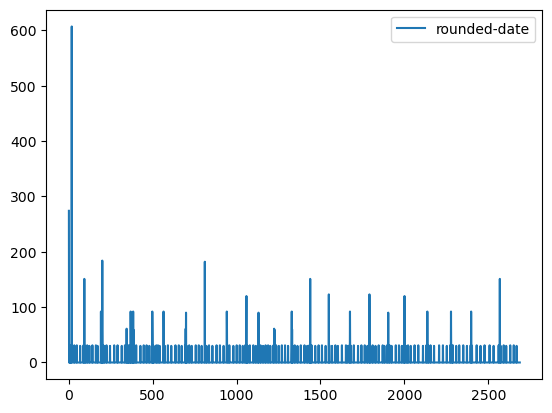

In [9]:
diffs = dia['rounded-date'].diff().reset_index().drop(columns = ['index']).apply(lambda val: val.dt.days, axis = 1)
dia.loc[:, 'diffs'] = diffs.values
diffs.plot()

In [10]:
dia

,ABUNDANCE,BIOMAS,date,rounded-date,diffs
0,0.03,0.32,1979-10-17,1979-10-01,NaN
1,0.58,1.04,1980-07-14,1980-07-01,274.0
2,0.92,6.25,1980-07-28,1980-07-01,0.0
3,0.55,0.37,1980-07-28,1980-07-01,0.0
4,0.96,5.52,1980-08-04,1980-08-01,31.0
...,...,...,...,...,...
2684,4.78,30.95,2006-10-16,2006-10-01,0.0
2685,2.88,26.83,2006-10-27,2006-10-01,0.0
2686,0.98,9.05,2006-10-27,2006-10-01,0.0
2687,2.71,24.39,2006-10-27,2006-10-01,0.0


In [11]:
grouped = dia.groupby(by = 'rounded-date').mean()[['ABUNDANCE', 'BIOMAS']].reset_index()

In [12]:
grouped

,rounded-date,ABUNDANCE,BIOMAS
0,1979-10-01,0.030000,0.320000
1,1980-07-01,0.683333,2.553333
2,1980-08-01,0.684000,3.464000
3,1980-09-01,0.367500,4.815000
4,1980-10-01,0.375000,4.057500
...,...,...,...
215,2006-06-01,0.850000,6.600667
216,2006-07-01,1.161250,4.721667
217,2006-08-01,1.842381,10.180952
218,2006-09-01,2.216471,11.810000


In [13]:
grouped['diff'] = grouped['rounded-date'].diff().dt.days
grouped[grouped['diff'] > 200]

,rounded-date,ABUNDANCE,BIOMAS,diff
1,1980-07-01,0.683333,2.553333,274.0
6,1982-07-01,3.560667,47.362000,607.0


In [14]:
trunced = grouped[grouped['rounded-date'] >= '1982-07-01']
trunced

,rounded-date,ABUNDANCE,BIOMAS,diff
6,1982-07-01,3.560667,47.362000,607.0
7,1982-08-01,8.458000,115.586000,31.0
8,1982-09-01,2.006500,19.512000,31.0
9,1982-10-01,4.211500,34.530500,30.0
10,1982-11-01,4.920000,47.164000,31.0
...,...,...,...,...
215,2006-06-01,0.850000,6.600667,31.0
216,2006-07-01,1.161250,4.721667,30.0
217,2006-08-01,1.842381,10.180952,31.0
218,2006-09-01,2.216471,11.810000,31.0


In [15]:
full_range = set(pd.date_range(start=trunced['rounded-date'].min(), end=trunced['rounded-date'].max(), freq='MS'))  # 'MS' = Month Start
existing = set(trunced['rounded-date'])

In [16]:
nans = pd.DataFrame({'rounded-date': list(full_range.difference(existing)), 'ABUNDANCE': np.nan, 'BIOMAS': np.nan})
nans

,rounded-date,ABUNDANCE,BIOMAS
0,2004-01-01,NaN,NaN
1,1997-03-01,NaN,NaN
2,1996-03-01,NaN,NaN
3,1997-11-01,NaN,NaN
4,1999-11-01,NaN,NaN
...,...,...,...
73,1997-02-01,NaN,NaN
74,1988-01-01,NaN,NaN
75,1985-12-01,NaN,NaN
76,1983-11-01,NaN,NaN


In [17]:
final = pd.concat([trunced, nans]).sort_values(by='rounded-date')[['rounded-date', 'ABUNDANCE', 'BIOMAS']].reset_index().drop(columns=['index'])
final

,rounded-date,ABUNDANCE,BIOMAS
0,1982-07-01,3.560667,47.362000
1,1982-08-01,8.458000,115.586000
2,1982-09-01,2.006500,19.512000
3,1982-10-01,4.211500,34.530500
4,1982-11-01,4.920000,47.164000
...,...,...,...
287,2006-06-01,0.850000,6.600667
288,2006-07-01,1.161250,4.721667
289,2006-08-01,1.842381,10.180952
290,2006-09-01,2.216471,11.810000


In [18]:
final.to_csv('oneida-skistodiaptomus.csv')